### Treść zadania

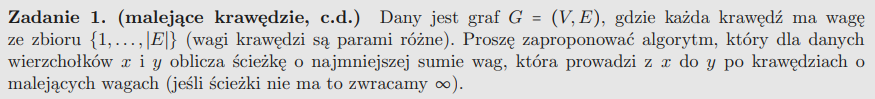

### Omówienie algorytmu

Wykorzystujemy ideę podobną do algorytmu Bellmana-Forda. Nie mamy jednak złożoności $ O(E \cdot V) $, a jedynie $ O(E \cdot log(E)) $ na samo tworzenie ścieżki (plus $ O(V + E) $ na utworzenie listy krawędzi). Wynika to stąd, że tym razem szukamy ścieżki o malejących wagach, więc to ograniczenie narzuca nam kolejność, w jakiej należy dokonywać realksacji krawędzi. W przypadku algorytmu Dijkstry było to dla nas spore ograniczenie, ponieważ musieliśmy poruszać się krawędziami i każdy wierzchołek mogliśmy odwiedzić wielokrotnie, a z każdego wierzchołka mogło wychodzić $ O(E) $ krawędzi (np. graf pełny), więc złożoność nam rosła. Tu jednak istnieje tylko jedna poprawna kolejność przetwarzania krawędzi, czyli od krawędzi o największej wadze do krawędzi o najmniejszej wadze (ponieważ chcemy mieć krawędzie o malejących wagach). Ponieważ po drodze może być wiele krawędzi o dużych wagach, których nie będziemy mogli włączyć do naszej ścieżki, bo z wierzchołka startowego wychodzą jedynie krawędzie o mniejszych wagach, konieczne jest odrzucenie krawędzi o większych wagach najpierw. Z tego powodu, najłatwiej jest posortować listę krawędzi po wagach i utworzyć tablicę, w której będziemy trzymali łączne wagi najkrótszych ścieżek, które prowadzą do każdego z wierzchołków. Początkowo ustawiamy wagi wszystkich wierzchołków poza wierzchołkiem startowym na $ \infty $, a wagę dla wierzchołka startowego na $ 0 $. Oznacza to tyle, że na razie nie istnieje ścieżka do żadnego wierzchołka. Następnie w pętli przechodzimy po krawędziach, zaczynając od krawędzi o największej wadze i kończąc na krawędzi o najmniejszej wadze. Jeżeli oba wierzchołki, które łączy dana krawędź, mają wagę $ \infty $, oznacza to, że dana krawędź nigdy nie znajdzie się na naszej ścieżce, jaką otrzymamy na wyjściu, ponieważ nie prowadzi do niej żadna ścieżka, składająca się z krawędzi o malejących wagach (waga ostatniej krawędzi na ścieżce musiałaby być większa od wagi przetwarzanej krawędzi, a skoro takiej krawędzi nie ma, to nie ma ścieżki, która by uwzględniała tę krawędź). Jeżeli jednak dana krawędź jest połączona z wierzchołkiem, do którego już prowadzi jakaś wyznaczona przez nas ścieżka, sprawdzamy wagi dwóch sąsiednich wierzchołków krawędzi i aktualizujemy wagę tego wierzchołka, który jest zgodny z kierunkiem, w którym prowadzi nasza ścieżka, zgodnie z poniższymi regułami (dla krawędzi $ u-v $):
- Jeżeli $ dist[u] > dist[v] $, to wierzchołek $ u $ leży na ścieżce dalej niż $ v $, więc idziemy w kierunku z $ v $ do $ u $, relaksacja wygląda następująco: <br>
$ dist[u] = min(dist[u], dist[v] + weight) $, gdzie $ weight $ - waga krawędzi z $ v $ do $ u $, <br>
- W przeciwnym razie ($ dist[u] < dist[v] $), relaksacja wygląda tak: <br>
$ dist[v] = min(dist[v], dist[u] + weight) $, gdzie $ weight $ - waga krawędzi z $ u $ do $ v $, <br>

###### Dlaczego algorytm jest poprawny?
Wydawać by się mogło, że taki sposób przeglądania krawędzi nie gwarantuje nam znalezienia najkrótszej ścieżki. A jednak algorytm jest poprawny (spójrzmy na poniższy przykład):
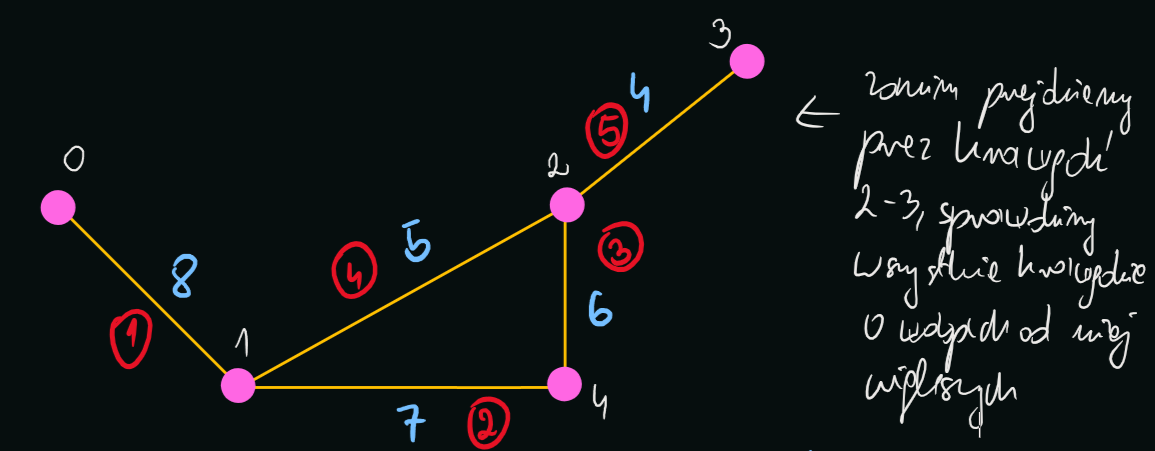
Ponieważ jednak wybieramy krawędzie kolejno o mniejszych wagach, a poprzednią krawędzią do danej zawsze musi być krawędź o wadze od niej silnie większej, zawsze dokonamy relaksacji na wierzchołku, w którym rozpoczyna się dana krawędź, sprawdzając wszystkie możliwe krawędzie do niego wchodzące i zapisując w nim długość najkrótszej ścieżki.
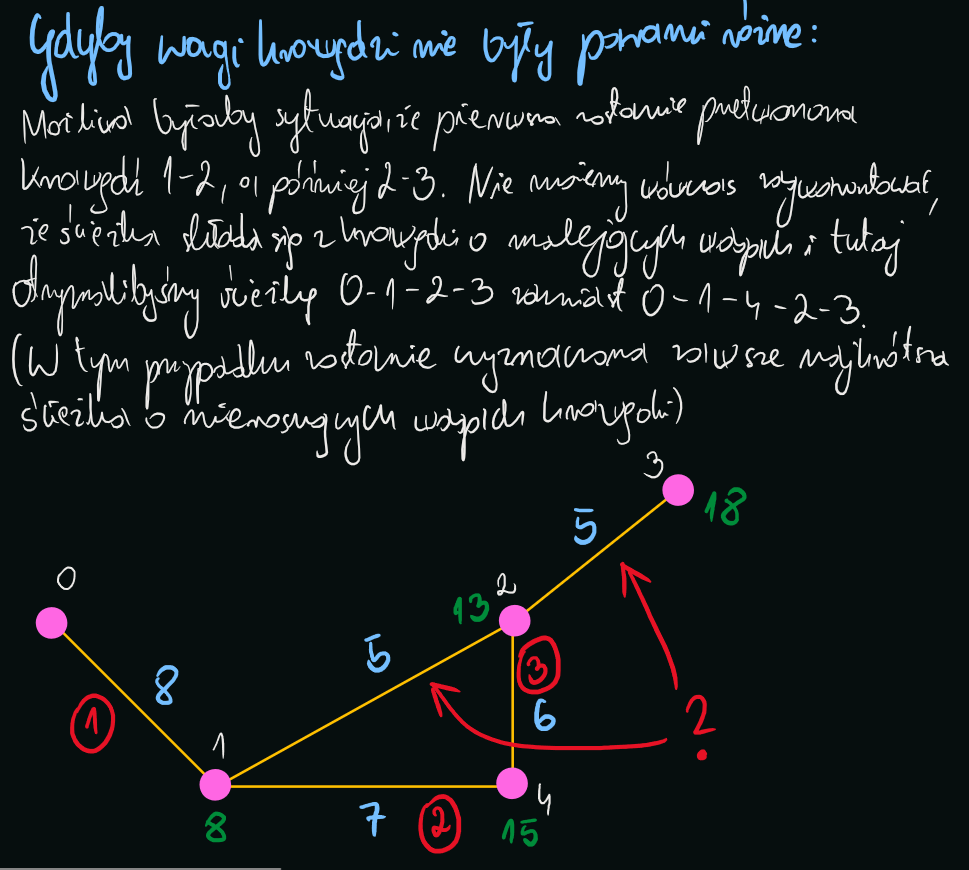
###### UWAGA
Algorytm działa również dla grafów o ujemnych wagach krawędzi.
###### UWAGA
W poniższym algorytmie najlepszą reprezentacją grafu jest reprezentacja w postaci listy krawędzi, co się rzadko zdarza. My jednak zakładamy, że na wejściu otrzymujemy graf w reprezentacji listowej i konwertujemy go na listę krawędzi (ten fragment kodu można łatwo zmodyfikować dla grafu reprezentowanego macierzowo lub usunąć, jeżeli graf jest reprezentowany przez listę krawędzi).

### Złożoność

###### Obliczeniowa:
$ O((V + E) + E \cdot log(E)) $  - dla reprezentacji listowej, ponieważ musimy przejść przez cały graf i utworzyć listę krawędzi, a następnie ją posortować po wagach. Jeżeli byśmy sortowali w czaie $ O(E) $ (krawędzie miały by wagi o rozkładzie jednostajnym lub byłyby z małego przedziału liczb całkowitych albo byłyby liczbami o ograniczonej liczbie cyfr), to otrzymalibyśmy złożoność $ O((V + E) + E) = O(V + E) $
###### Pamięciowa:
$ O(E) $  - bo tworzymy listę krawędzi

### Implementacja #1
##### (Z użyciem sortowania $ O(E \cdot log(E)) $ - i tak jest szybsze od liniowego, bo to Python)

In [1]:
def graph_to_edges(G: 'graph represented by adjacency lists'):
    n = len(G)
    E = []
    
    for u in range(n):
        for v, weight in G[u]:
            E.append((u, v, weight))

    return E


def reverse(A):
    n = len(A)
    for i in range(n // 2):
        swap(A, i, n - 1 - i)
        
    
def swap(A, i, j):
    A[i], A[j] = A[j], A[i]


def get_path(parents, s, t):
    if not parents[t]:
        return []
    
    path = [t]
    u = parents[t][-1][0]
    prev_dist = parents[t][-1][2]

    while u != s:
        for i in range(len(parents[u]) - 1, -1, -1):
            v, weight, dist = parents[u][i]
            if dist + weight == prev_dist:
                path.append(u)
                prev_dist = dist
                u = v
                break
        # If there is no parent, return an empty list
        # as there is no path
        else:
            return []
        
    path.append(s)
    reverse(path)
        
    return path

            
def descending_min_path(G: 'graph represented by adjacency lists', s: 'start', t: 'target'):
    E = graph_to_edges(G)
    n = len(G)
    inf = float('inf')
    dist = [inf] * n
    parents = [[] for _ in range(n)]
    dist[s] = 0
    
    E.sort(key=lambda e: e[2], reverse=True)
    
    for u, v, weight in E:
        if dist[u] < dist[v]:
            if dist[u] + weight < dist[v]:
                dist[v] = dist[u] + weight
                parents[v].append((u, weight, dist[u]))
        else:
            if dist[v] + weight < dist[u]:
                dist[u] = dist[v] + weight
                parents[u].append((v, weight, dist[v]))

    return get_path(parents, s, t), dist[t]

###### Kilka testów

##### Pomocnicze

In [2]:
def undirected_weighted_graph_list(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in E:
        G[e[0]].append((e[1], e[2]))
        G[e[1]].append((e[0], e[2]))
    return G

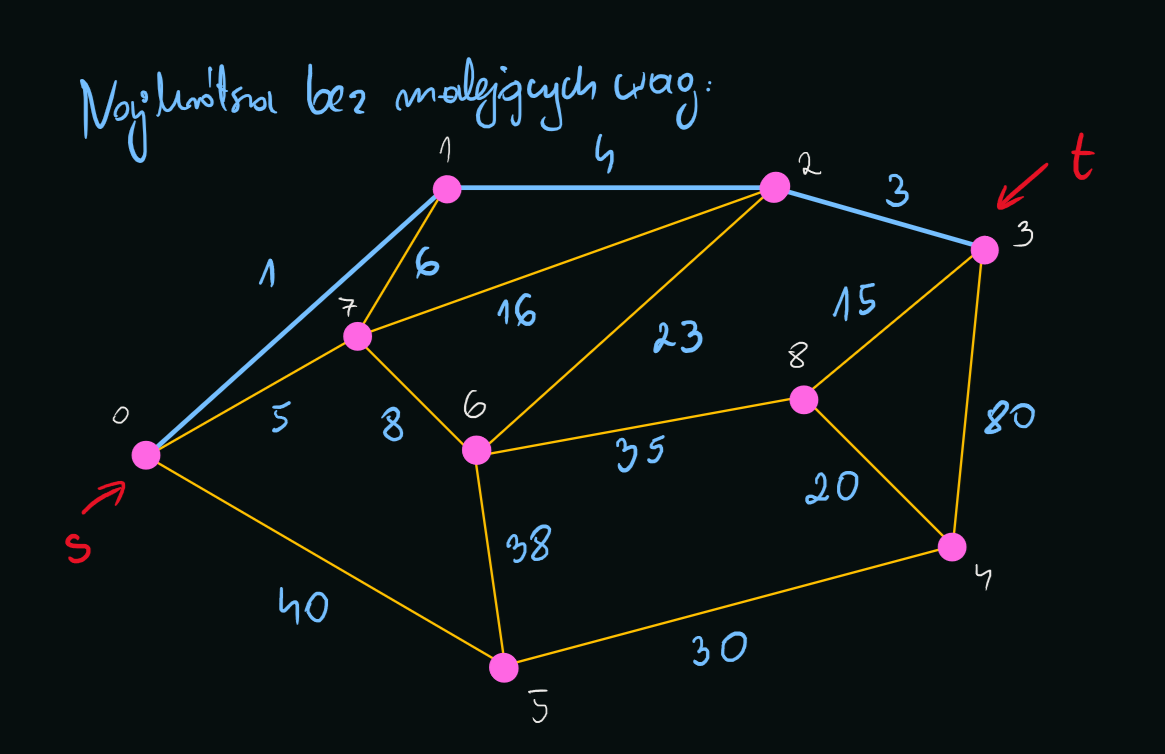

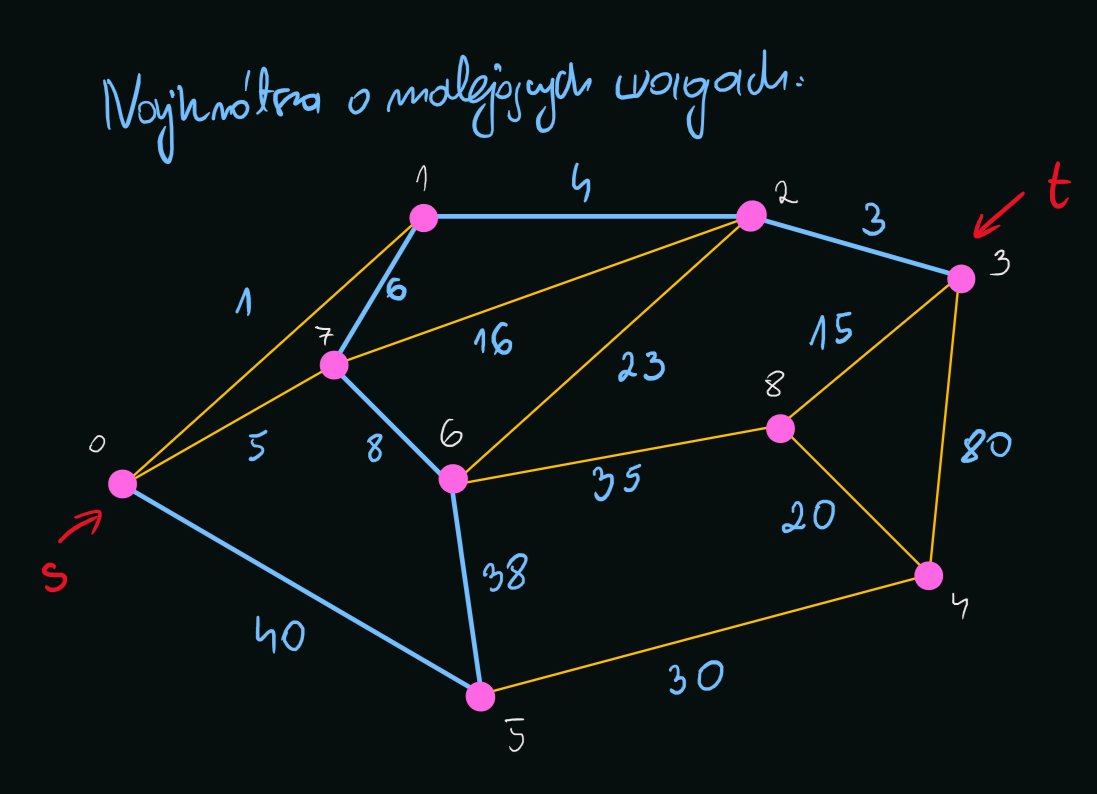

In [3]:
E = [(0, 1, 1), (1, 2, 4), (2, 3, 3), (0, 5, 40), (5, 6, 38), (0, 7, 5), (6, 7, 8), (7, 1, 6),
     (7, 2, 16), (6, 2, 23), (6, 8, 35), (5, 4, 30), (8, 4, 20), (8, 3, 15), (4, 3, 80)]

G = undirected_weighted_graph_list(E)

print(descending_min_path(G, 0, 3))
print(descending_min_path(G, 1, 3))
print(descending_min_path(G, 3, 1))
print(descending_min_path(G, 2, 0))

([0, 5, 6, 7, 1, 2, 3], 99)
([1, 2, 3], 7)
([], inf)
([2, 1, 0], 5)


### Implementacja #2
##### (Z użyciem sortowania $ O(E) $ - i tak jest wolniejsze)

Implementacja dobra w innych językach (w Pythonie i tak nic nie przebije wbudowanego sortowania). Wagi muszą być liczbami całkowitymi, najlepiej żeby miały jak najmniej cyfr (taka specyfika Radix Sorta).

In [4]:
def radix_sort(arr, base=10, *, fn=lambda x: x, reverse=False):
    if len(arr) > 1:
        first_non_negative_idx, min_negative, max_positive = _partition(arr, fn)
        # If not all the numbers are positive (there are some negative integers)
        if first_non_negative_idx > 0:
            _radix_sort(arr, 0, first_non_negative_idx - 1, min_negative, base, fn)
        # If not all the numbers are negative (there are some positive integers)
        if first_non_negative_idx < len(arr):
            _radix_sort(arr, first_non_negative_idx, len(arr) - 1, max_positive, base, fn)
    
    if reverse:
        n = len(arr)
        for i in range(n // 2):
            swap(arr, i, n - 1 - i)
            
            
def _radix_sort(arr, begin_idx, end_idx, limit, base, fn):
    digit_place = 1
    limit = abs(limit)
    while limit >= digit_place:
        _counting_sort(arr, begin_idx, end_idx, digit_place, base, fn)
        digit_place *= base
            
# This function moves negative elements to the left and positive ones to the right side
# of an array. Time complexity is only O(n) as it uses approach similar to the Quick Sort
# Lomuto's partition with the pivot set to -1 as it partitions an array into a part of values 
# lower than or equal to a pivot and values greater than a pivot
def _partition(arr, fn):
    pivot = -1
    max_val = fn(arr[0])
    # If there is no negative number, we will still return -1 value (this value is used only
    # to store the lowest number (if there are negative numbers))
    min_val = -1

    # Partition an array into 2 subarrays of elements lower than or
    # equal to a pivot and of elements greater than a pivot
    i = 0
    for j in range(len(arr)):
        val = fn(arr[j])
        if val <= pivot:
            if val < min_val:
                min_val = val
            _swap(arr, i, j)
            i += 1
        elif val > max_val:
            max_val = val

    return i, min_val, max_val

        
def _swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]


def _counting_sort(arr, begin_idx, end_idx, digit_place, base, fn):
    # Allocate memory for required temporary arrays
    counts = [0] * base
    result = [None] * (end_idx - begin_idx + 1)
    # Count digits repetitions
    for i in range(begin_idx, end_idx + 1):
        digit = (fn(arr[i]) // digit_place) % base
        counts[digit] += 1
    # Modify the counts array to indicate how many digits are not greater than the current one
    for i in range(1, base):
        counts[i] += counts[i - 1]
    # Rewrite values to the result sorted array
    for i in range(end_idx, begin_idx - 1, -1):
        digit = (fn(arr[i]) // digit_place) % base
        counts[digit] -= 1
        result[counts[digit]] = arr[i]
    # Rewrite sorted values to the initial array
    for i in range(len(result)):
        arr[begin_idx + i] = result[i]
        

def graph_to_edges(G: 'graph represented by adjacency lists'):
    n = len(G)
    E = []
    
    for u in range(n):
        for v, weight in G[u]:
            E.append((u, v, weight))

    return E


def reverse(A):
    n = len(A)
    for i in range(n // 2):
        swap(A, i, n - 1 - i)
        
    
def swap(A, i, j):
    A[i], A[j] = A[j], A[i]


def get_path(parents, s, t):
    if not parents[t]:
        return []
    
    path = [t]
    u = parents[t][-1][0]
    prev_dist = parents[t][-1][2]

    while u != s:
        for i in range(len(parents[u]) - 1, -1, -1):
            v, weight, dist = parents[u][i]
            if dist + weight == prev_dist:
                path.append(u)
                prev_dist = dist
                u = v
                break
        # If there is no parent, return an empty list
        # as there is no path
        else:
            return []
        
    path.append(s)
    reverse(path)
        
    return path

            
def descending_min_path(G: 'graph represented by adjacency lists', s: 'start', t: 'target'):
    E = graph_to_edges(G)
    n = len(G)
    inf = float('inf')
    dist = [inf] * n
    parents = [[] for _ in range(n)]
    dist[s] = 0
    
    radix_sort(E, fn=lambda e: e[2], reverse=True)
    
    for u, v, weight in E:
        if dist[u] < dist[v]:
            if dist[u] + weight < dist[v]:
                dist[v] = dist[u] + weight
                parents[v].append((u, weight, dist[u]))
        else:
            if dist[v] + weight < dist[u]:
                dist[u] = dist[v] + weight
                parents[u].append((v, weight, dist[v]))

    return get_path(parents, s, t), dist[t]

###### Kilka testów

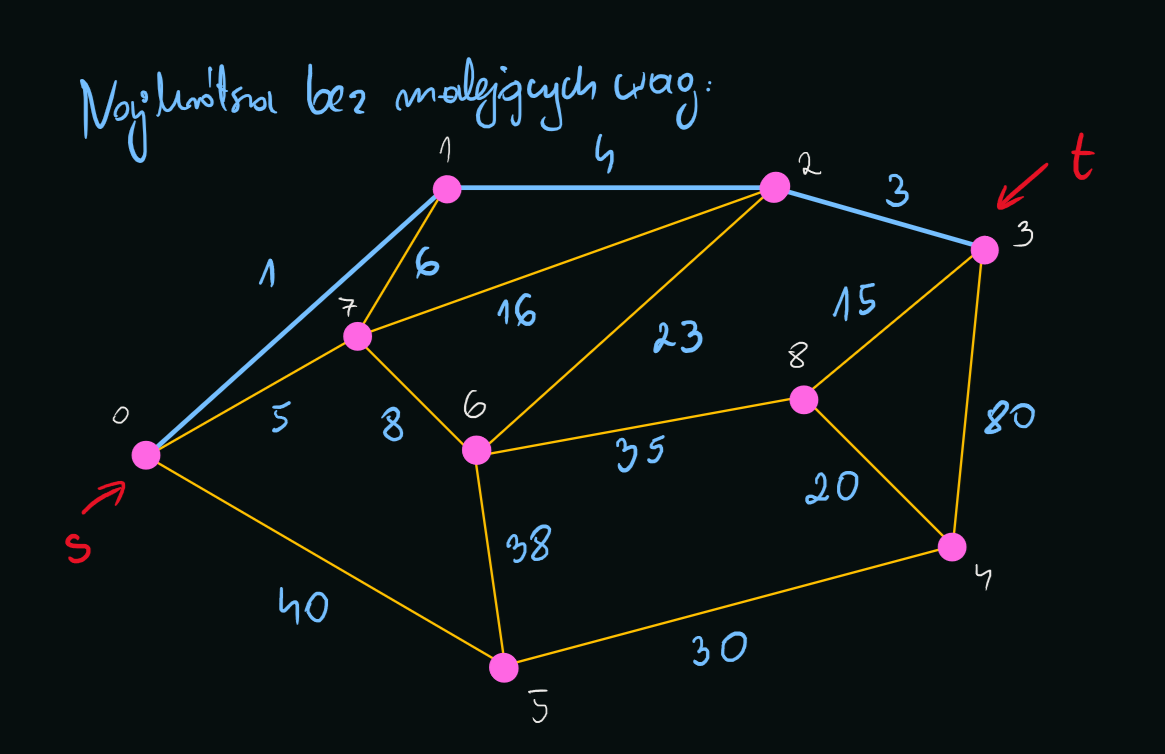

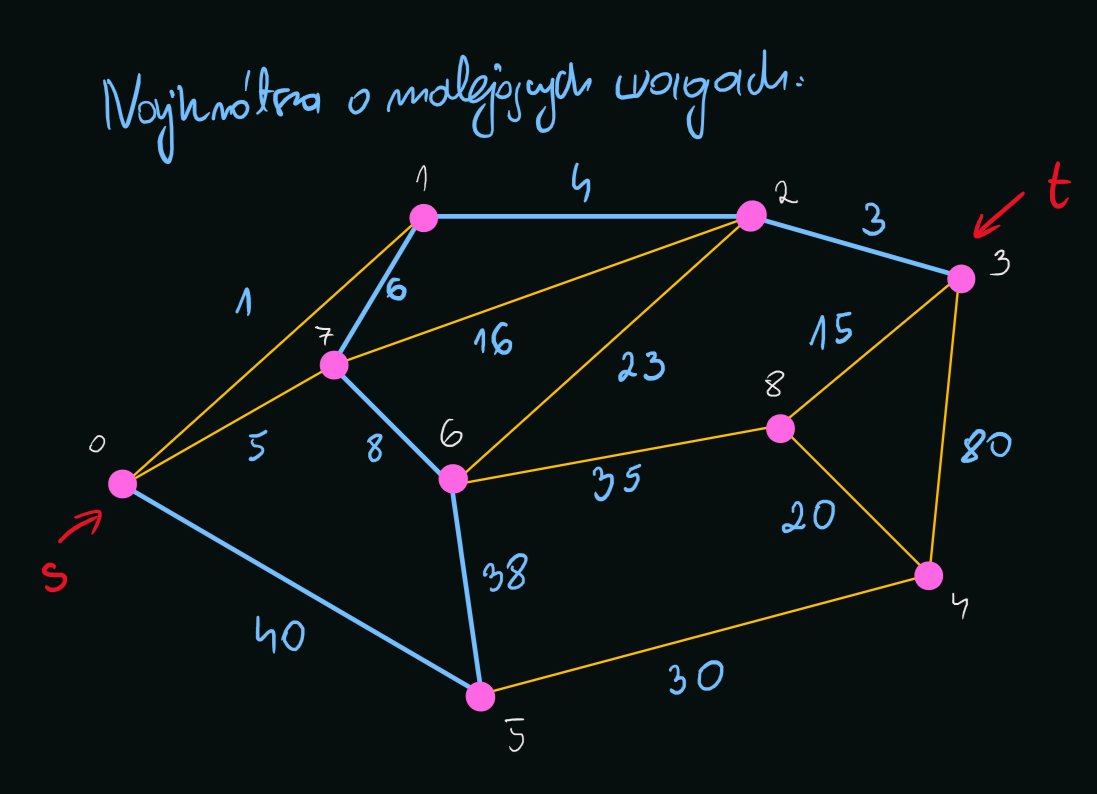

In [5]:
E = [(0, 1, 1), (1, 2, 4), (2, 3, 3), (0, 5, 40), (5, 6, 38), (0, 7, 5), (6, 7, 8), (7, 1, 6),
     (7, 2, 16), (6, 2, 23), (6, 8, 35), (5, 4, 30), (8, 4, 20), (8, 3, 15), (4, 3, 80)]

G = undirected_weighted_graph_list(E)

print(descending_min_path(G, 0, 3))
print(descending_min_path(G, 1, 3))
print(descending_min_path(G, 3, 1))
print(descending_min_path(G, 2, 0))

([0, 5, 6, 7, 1, 2, 3], 99)
([1, 2, 3], 7)
([], inf)
([2, 1, 0], 5)
